## K-means con dataset balanceado.

In [1]:
#Importando librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.utils import shuffle

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [2]:
#Cargando dataset

path_file_benigno = "Datasets/Data_Benigno.csv"
path_file_ransomware = "Datasets/Data_Ransomware.csv"

dataBe = pd.read_csv(path_file_benigno)
dataRan = pd.read_csv(path_file_ransomware)


c_benigno = dataBe.shape[0]
c_Ransomware = dataRan.shape[0]

cantidadFinal = c_Ransomware if (c_benigno > c_Ransomware) else c_benigno

data_Be_balanced = dataBe.head(cantidadFinal)
data_Ra_balanced = dataRan.head(cantidadFinal)

dataF = pd.concat([data_Be_balanced, data_Ra_balanced], axis=0)
dataF

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Label,binaryLabel,benignoLabel,ransomwareLabel
0,13,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,153846.153800,1.040000e+07,Benigno,1,1,0
1,15,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,133333.333300,9.000000e+06,Benigno,1,1,0
2,14,0,2,0,111,-1,40.0,-1,71,0.0,55.5,0.000000,21.897488,142857.142900,7.928571e+06,Benigno,1,1,0
3,0,0,1,0,83,-1,83.0,-1,83,0.0,83.0,0.000000,0.000000,0.000000,0.000000e+00,Benigno,1,1,0
4,13,0,2,0,159,-1,52.0,-1,107,0.0,79.5,0.000000,38.878014,153846.153800,1.220000e+07,Benigno,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74883,1925248,55237504,46,54,8572,12611,52.0,75,405,75.0,405.0,0.000000,0.000000,0.398660,6.901801e+01,Ransomware,0,0,1
74884,6935,55118503,51,55,8844,12692,52.0,52,52,52.0,52.0,0.000000,0.000000,3944.773176,7.218935e+05,Ransomware,0,0,1
74885,4053974,30711742,24,25,2652,12942,52.0,40,-1,40.0,0.0,1.000000,0.000000,0.000000,0.000000e+00,Ransomware,0,0,1
74886,5744,66134134,11,16,1198,16758,52.0,1390,40,1390.0,40.0,0.447214,0.000000,0.000000,0.000000e+00,Ransomware,0,0,1


In [3]:
print("Cantidad de ramsonware: ",dataRan.shape[0])
print("Cantidad de Benigno: ", dataBe.shape[0])

Cantidad de ramsonware:  74888
Cantidad de Benigno:  137907


In [4]:
#Aleatorizamos las filas

data = shuffle(dataF)
data

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Label,binaryLabel,benignoLabel,ransomwareLabel
31792,2,2,0,104,0,52,-1.0,52,-1,52.000000,0.000000,1.000000,0.000000,1000000.000000,5.200000e+07,Benigno,1,1,0
41386,31053011,16,7,3485,5734,389,-1.0,60,-1,60.000000,0.000000,0.447214,0.000000,0.266667,1.406668e+01,Ransomware,0,0,1
69014,59966883,8,4,2860,768,52,77.0,1078,307,357.500000,192.000000,452.854597,132.789307,0.200110,6.050006e+01,Benigno,1,1,0
34208,1884344,19,0,3380,13624,311,-1.0,40,-1,40.000000,0.000000,1.000000,0.000000,0.736886,3.831809e+01,Ransomware,0,0,1
17041,8742,3,0,865,0,52,-1.0,730,-1,288.333333,0.000000,382.807828,0.000000,343.170899,9.894761e+04,Benigno,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22615,83253,3,0,187,0,52,-1.0,83,-1,62.333333,0.000000,17.883885,0.000000,36.034737,2.246165e+03,Benigno,1,1,0
60236,55065752,12,6,3000,1278,52,213.0,448,213,250.000000,213.000000,206.804035,0.447214,0.326882,7.768894e+01,Benigno,1,1,0
3289,5494271,13,8,1064,13643,32,52.0,1356,1390,193.916667,639.923077,373.591405,598.740896,0.029974,7.806457e+00,Ransomware,0,0,1
18675,0,5,2,1228,18844,132,-1.0,52,-1,52.000000,0.000000,0.000000,0.000000,0.500399,2.635434e+01,Ransomware,0,0,1


In [5]:
#Separamos la informacion 

dataX = data.drop(['Label','benignoLabel', 'ransomwareLabel'], axis=1).copy()
dataY = data[['binaryLabel']].copy()

dataX

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,binaryLabel
31792,2,2,0,104,0,52,-1.0,52,-1,52.000000,0.000000,1.000000,0.000000,1000000.000000,5.200000e+07,1
41386,31053011,16,7,3485,5734,389,-1.0,60,-1,60.000000,0.000000,0.447214,0.000000,0.266667,1.406668e+01,0
69014,59966883,8,4,2860,768,52,77.0,1078,307,357.500000,192.000000,452.854597,132.789307,0.200110,6.050006e+01,1
34208,1884344,19,0,3380,13624,311,-1.0,40,-1,40.000000,0.000000,1.000000,0.000000,0.736886,3.831809e+01,0
17041,8742,3,0,865,0,52,-1.0,730,-1,288.333333,0.000000,382.807828,0.000000,343.170899,9.894761e+04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22615,83253,3,0,187,0,52,-1.0,83,-1,62.333333,0.000000,17.883885,0.000000,36.034737,2.246165e+03,1
60236,55065752,12,6,3000,1278,52,213.0,448,213,250.000000,213.000000,206.804035,0.447214,0.326882,7.768894e+01,1
3289,5494271,13,8,1064,13643,32,52.0,1356,1390,193.916667,639.923077,373.591405,598.740896,0.029974,7.806457e+00,0
18675,0,5,2,1228,18844,132,-1.0,52,-1,52.000000,0.000000,0.000000,0.000000,0.500399,2.635434e+01,0


In [6]:
print("Ransomware = 1 \nBenigno = 0")
dataY

Ransomware = 1 
Benigno = 0


,binaryLabel
31792,1
41386,0
69014,1
34208,0
17041,1
...,...
22615,1
60236,1
3289,0
18675,0


In [7]:
dataX.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,binaryLabel
count,1.497760e+05,1.497760e+05,149776.000000,1.497760e+05,1.497760e+05,149776.000000,149776.000000,149776.000000,149776.000000,149776.000000,149776.000000,149776.000000,149776.000000,1.497760e+05,1.497760e+05,149776.000000
mean,3.155877e+07,2.778276e+04,7.839981,1.306556e+03,1.209905e+04,199.951508,49.994492,235.628752,246.501088,107.538422,136.193752,77.350531,87.568348,4.523757e+04,2.349517e+06,0.500000
std,2.056215e+08,1.995322e+06,205.178595,3.191709e+04,2.995728e+05,405.653757,87.134555,333.295591,421.729064,117.907072,233.270876,144.871525,181.026950,1.973894e+05,1.051974e+07,0.500002
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.928000e+03,2.000000e+00,1.000000,1.040000e+02,5.200000e+01,52.000000,-1.000000,52.000000,-1.000000,52.000000,0.000000,0.000000,0.000000,1.483442e-01,1.674836e+01,0.000000
50%,1.142135e+05,4.000000e+00,2.000000,5.190000e+02,1.160000e+03,52.000000,52.000000,59.000000,52.000000,54.666667,52.000000,1.000000,0.000000,4.728948e+00,5.893092e+02,0.500000
75%,7.696119e+06,1.300000e+01,6.000000,1.877000e+03,1.271100e+04,348.000000,52.000000,331.000000,271.000000,114.000000,143.000000,82.805742,41.286196,8.620674e+01,1.286254e+04,1.000000
max,1.154108e+10,2.630639e+08,53758.000000,1.220839e+07,7.463559e+07,126552.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,954.593631,946.108345,2.000000e+06,4.920000e+08,1.000000


In [8]:
print(dataY.groupby('binaryLabel').size())

binaryLabel
0    74888
1    74888
dtype: int64


In [10]:
Labels = [
          'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
          'TotLen Bwd Pkts', 'Fwd Pkt Len Min', 'Bwd Pkt Len Min',
          'Fwd Pkt Len Max', 'Bwd Pkt Len Max', 'Fwd Pkt Len Mean',
          'Bwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Std',
          'Flow Pkts/s', 'Flow Byts/s'
         ]

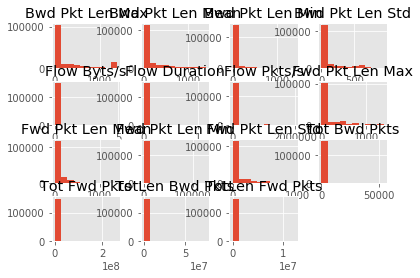

In [11]:
#Visualizacion de informacion.

dataX.drop(['binaryLabel'],1).hist()
plt.show()

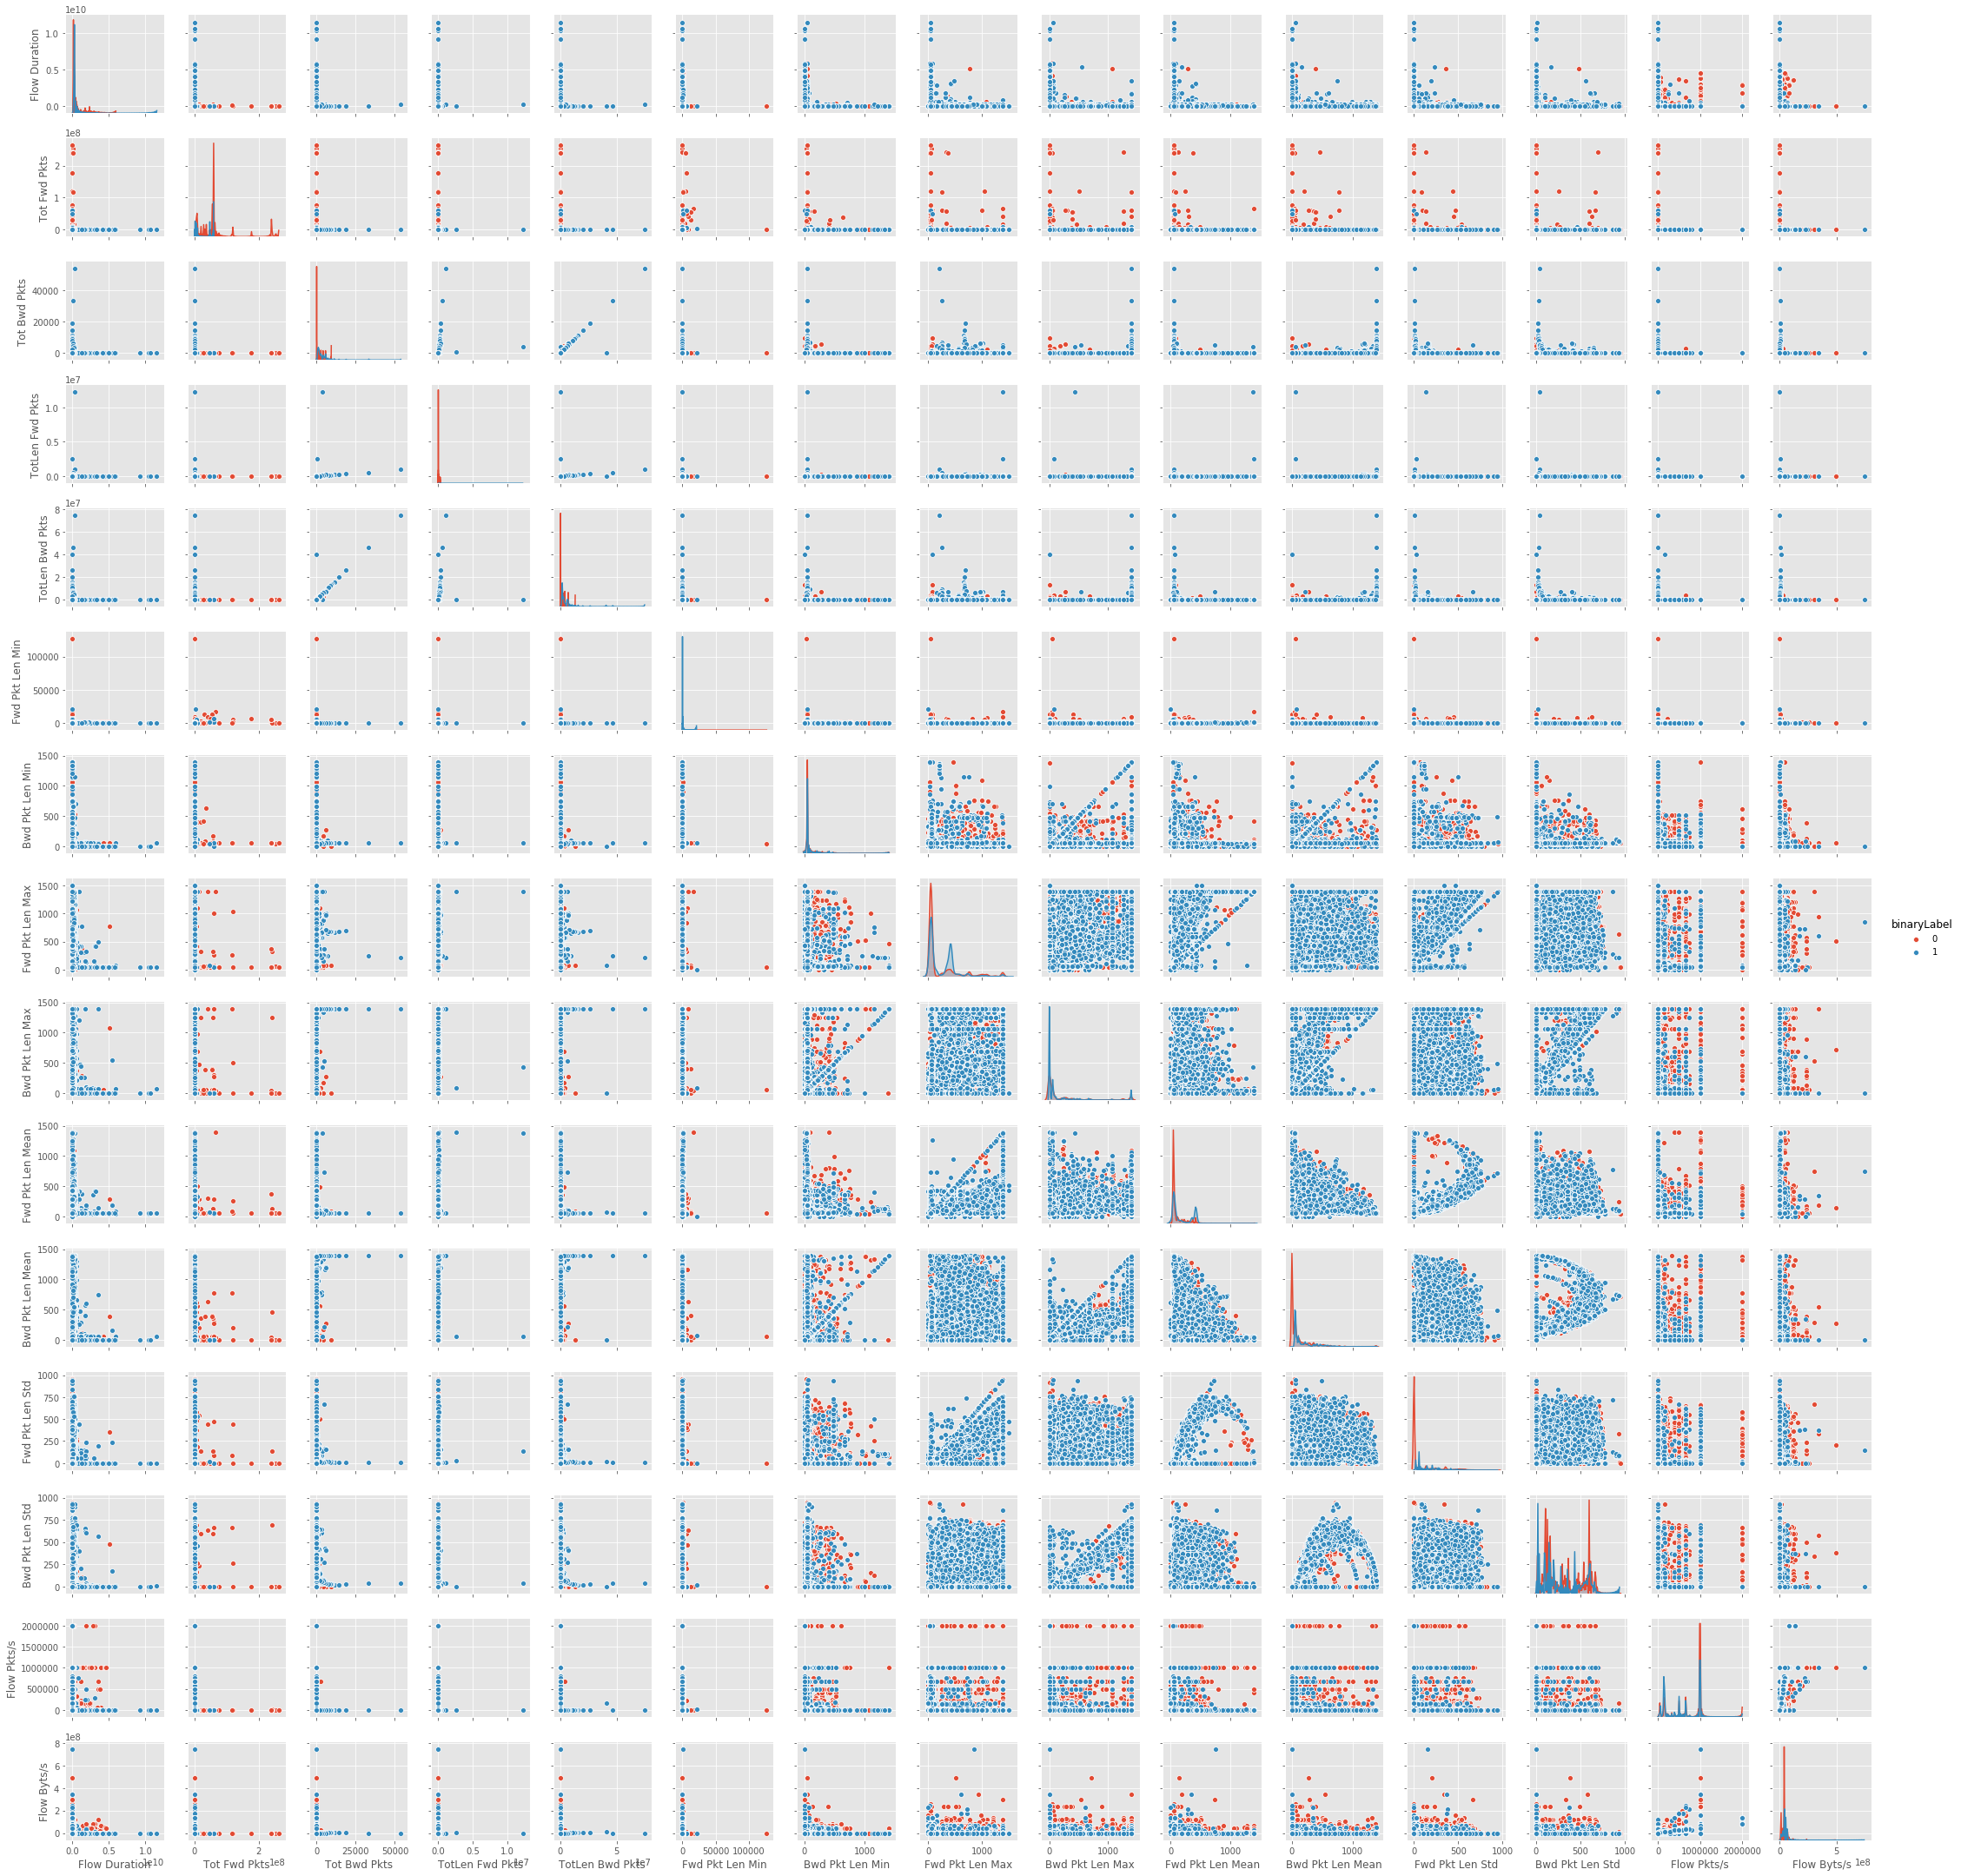

In [10]:
#Esto es antiguo
Labels = [
          'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
          'TotLen Bwd Pkts', 'Fwd Pkt Len Min', 'Bwd Pkt Len Min',
          'Fwd Pkt Len Max', 'Bwd Pkt Len Max', 'Fwd Pkt Len Mean',
          'Bwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Std',
          'Flow Pkts/s', 'Flow Byts/s'
         ]
sb.pairplot(dataX.dropna(), hue='binaryLabel', height=2, vars=Labels, kind='scatter')

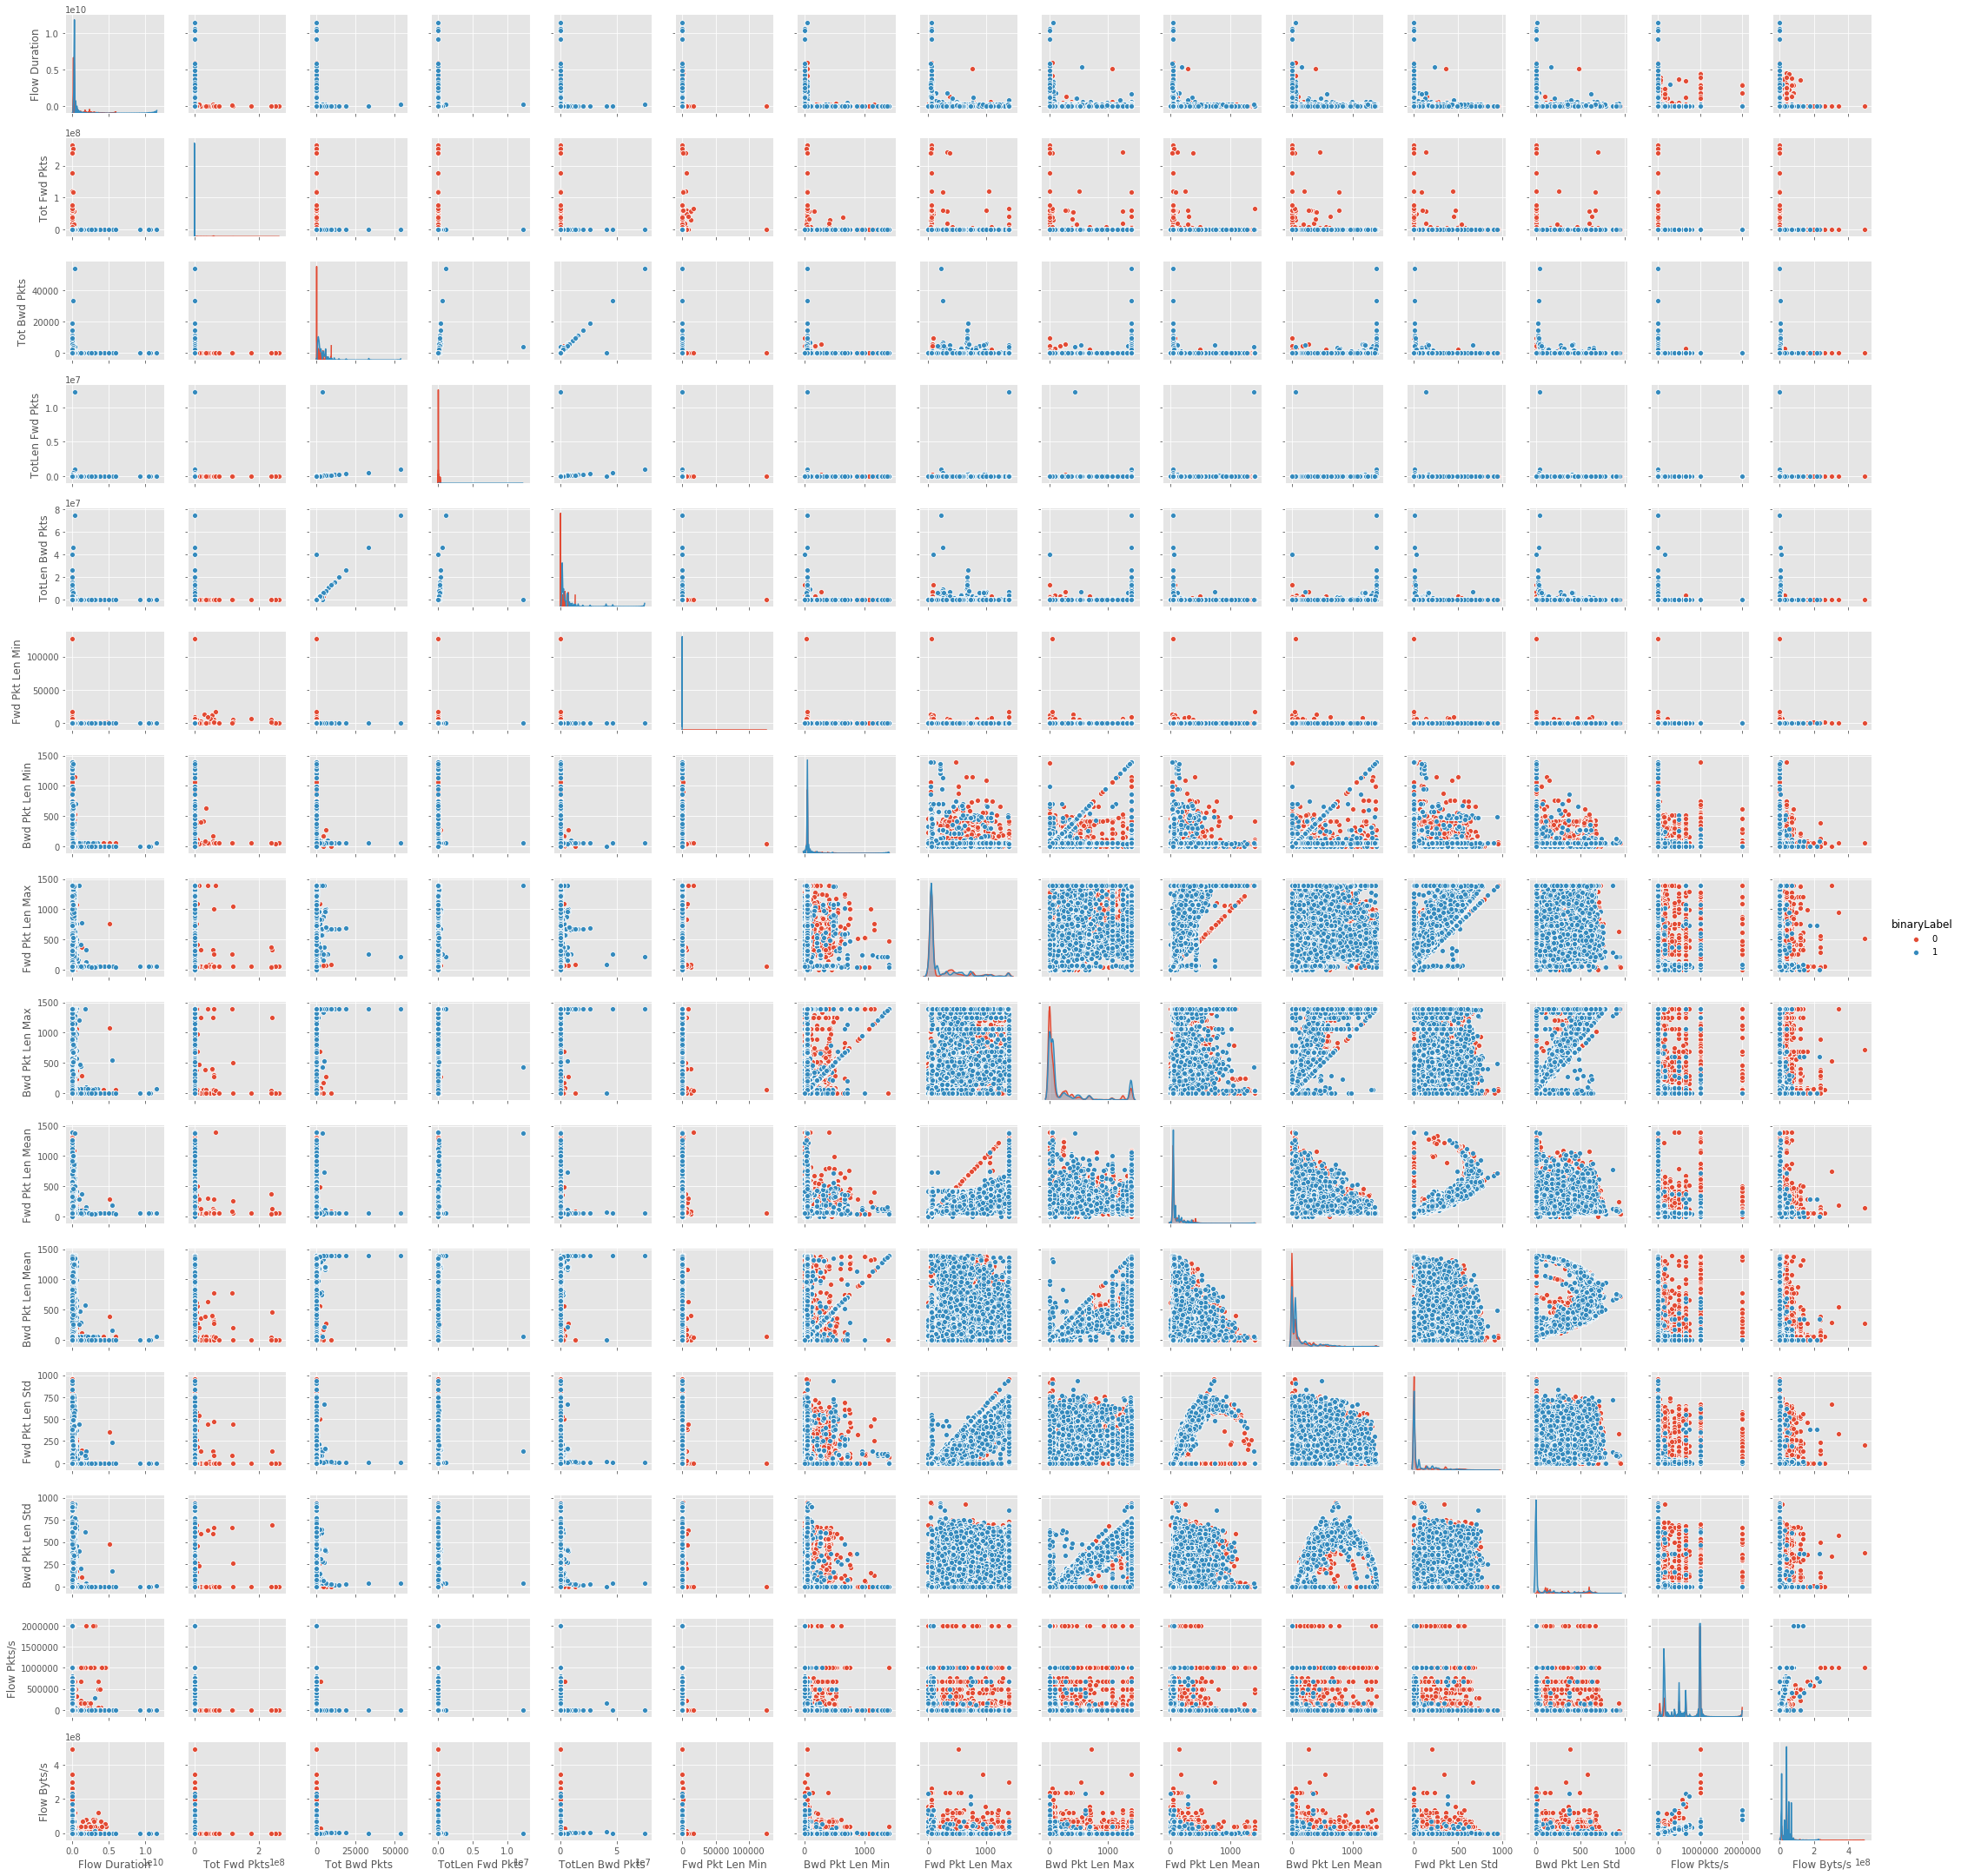

In [13]:
#Lo mimos de arriba con el dataset arreglado
Labels = [
          'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
          'TotLen Bwd Pkts', 'Fwd Pkt Len Min', 'Bwd Pkt Len Min',
          'Fwd Pkt Len Max', 'Bwd Pkt Len Max', 'Fwd Pkt Len Mean',
          'Bwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Std',
          'Flow Pkts/s', 'Flow Byts/s'
         ]
sb.pairplot(dataX.dropna(), hue='binaryLabel', height=2, vars=Labels, kind='scatter')

## Normalizacion

In [ ]:
#Aqui deberia ir la normalizacion de datos.

In [12]:
X = np.array(dataX[Labels])
y = np.array(dataX['binaryLabel'])
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

X.shape:  (149776, 15)
y.shape:  (149776,)


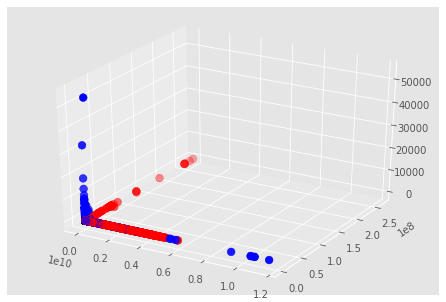

In [13]:
#Grafica 3d respecto a las  3 categorias
fig = plt.figure()
ax = Axes3D(fig)
colores=['red','blue']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)

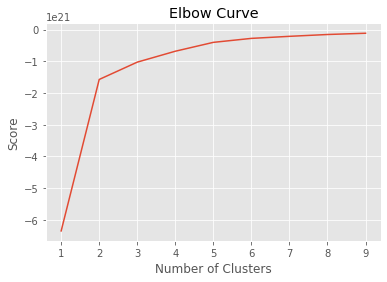

In [14]:
Nc = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## En base al grafico anterior la curva se aplana en 4 o a los 3 clusters.

### De todas formas sabemos que hay 2 clases si o si ransomware y benigno

### Probaremos con  K = 2.

# Ejecutar Kmeans

In [23]:
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.97055987e+07 2.79048438e+04 7.85694647e+00 1.30572865e+03
  1.20993705e+04 1.99423447e+02 5.02068885e+01 2.36430656e+02
  2.47559647e+02 1.07780222e+02 1.36775965e+02 7.76802363e+01
  8.79441852e+01 4.52282835e+04 2.34968014e+06]
 [2.72186896e+09 7.37473364e+01 3.98934551e+00 1.49436073e+03
  1.20265510e+04 3.19805175e+02 1.78691020e+00 5.36210046e+01
  6.24048706e+00 5.26572002e+01 4.04906040e+00 2.51747698e+00
  2.26470921e+00 4.73452193e+04 2.31252633e+06]]


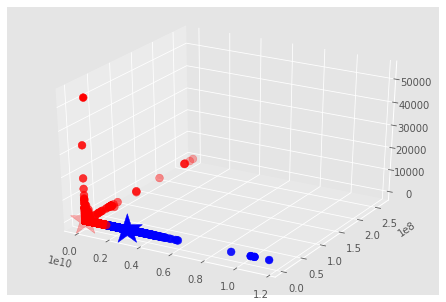

In [24]:
#Prediccion de clusters

labels = kmeans.predict(X)
C= kmeans.cluster_centers_
colores = ['red','blue']
asignar = []
for row in labels:
    asignar.append(colores[row])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2], c=asignar, s=60)
ax.scatter(C[:,0],C[:,1],C[:,2], marker='*', c=colores, s=1000)

In [33]:
#Podemos separar la cantidad de miembros que tiene cada cluster

cantidadGrupo = pd.DataFrame()
copy = pd.DataFrame()
copy['label'] = labels;
cantidadGrupo['color'] = colores
cantidadGrupo['Tipo'] = {'Benigno', 'Ransomware'}
cantidadGrupo['cantidad'] = copy.groupby('label').size()
cantidadGrupo

,color,Tipo,cantidad
0,red,Benigno,149119
1,blue,Ransomware,657


In [37]:
#Probaremos si predice si es ramsonware
#La linea de abajo, en exacto la tupla, es una tupla de un ransomware confirmado.
X_new = np.array([[0,0,1,0,83,-1,83.0,1093,789,314.25,238.25,519.1800426,367.1855798,1.043093858,54.24088062]])

#La prediccion al probar la tupla deberia dar 0(benigno) o 1(ransomware) 
new_labels = kmeans.predict(X_new)
if(new_labels == 0):
    print(new_labels, "- Benigno")
else:
    print(new_labels, "- Ransomware")

[0] - Benigno


## Respecto a lo anterior

#### Notamos que al utilizar k = 2, los grupos estan desproporcionados. 
#### Ademas que no predice correctamente el grupo de una tupla real ransomware.

No se me ocurre que otra cosa considerar.

In [21]:
kmeans.labels_.shape

(149776,)

## Probando con K = 3 

[[1.86071613e+07 2.79323692e+04 7.86091346e+00 1.30572342e+03
  1.21001466e+04 1.99280858e+02 5.02552829e+01 2.36603563e+02
  2.47795109e+02 1.07832914e+02 1.36903654e+02 7.77540216e+01
  8.80286829e+01 4.52230967e+04 2.34972233e+06]
 [1.79807293e+09 1.09760148e+01 3.96309963e+00 1.48552583e+03
  1.21870793e+04 3.26053506e+02 1.40036900e+00 5.52084871e+01
  6.38929889e+00 5.28674252e+01 4.88532358e+00 2.22150020e+00
  2.08503411e+00 4.68329641e+04 2.10300335e+06]
 [3.74139510e+09 1.67961832e+02 3.95801527e+00 1.40977863e+03
  1.12940153e+04 3.20412214e+02 2.23664122e+00 5.45916031e+01
  7.44656489e+00 5.31896204e+01 4.18490246e+00 3.34724058e+00
  2.66345349e+00 5.01663365e+04 2.74282291e+06]]


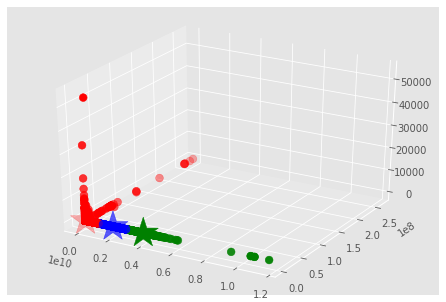

In [38]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

#Prediccion de clusters

labels = kmeans.predict(X)
C= kmeans.cluster_centers_
colores = ['red','blue','green']
asignar = []
for row in labels:
    asignar.append(colores[row])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2], c=asignar, s=60)
ax.scatter(C[:,0],C[:,1],C[:,2], marker='*', c=colores, s=1000)

In [40]:
#Podemos separar la cantidad de miembros que tiene cada cluster

cantidadGrupo = pd.DataFrame()
copy = pd.DataFrame()
copy['label'] = labels;
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,148972
1,blue,542
2,green,262
